# Climatology Data Products Tutorial for Roughan et al (2022)

|  |  |
| ----------- | ----------- |
| Author:| Michael Hemming |
| Edited:| Benjamin Stepin |
| Affiliation:| UNSW, NSW-IMOS |
| e-mail:| info@aodn.org.au |
| Date of creation:| 18th June., 2021 |
| Date of last update:| 30th July., 2024 |


<br/><br/>

## Table of Contents
### [Background](#background)
### [Required Packages](#)

1. [Demonstration: Downloading files](#demonstration-downloading-files)
2. [Citation: Use of data products](#citation-use-of-data-products)
3. [Loading the netCDF files](#3-demonstration-loading-the-netcdf-files)
4. [Scatter aggregated data over time and depth, colored by platform type](#4-demonstration-scatter-aggregated-data-over-time-and-depth-colored-by-platform-type)
5. [Compare gridded temperature data over the last 10 years](#5-demonstration-compare-gridded-temperature-data-at-the-surface-20-m-50-m-75-m-and-90-m-over-the-last-10-years)
6. [Plot mean climatologies over depth](#6-demonstration-plot-mean-climatologies-over-depth)
7. [Export data as CSV files](#7-demonstration-export-data-as-csv-files)







### Background

Multi-decadal ocean time-series are fundamental baselines for assessing the impacts of environmental change, however, compiling and quality controlling historic data from multiple sources remains challenging. 

UNSW document, and release a number of long time-series temperature products and climatologies compiled from data obtained at 4 monitoring sites around Australia where sub-surface ocean temperature has been recorded nominally weekly to monthly since the 1940s/50s. 

In recent years, the sampling was augmented with data obtained from moored sensors, vertical profiles and satellite-derived data. The temperature data have been quality controlled, and combined using a rigorously tested methodology. Multi-decadal, multi-depth, multi-platform temperature time-series at each site are packaged and a range of daily temperature climatologies from different data combinations and time periods are produced. 

The data products are provided as CF-compliant NetCDF files and updated periodically. The long-term temperature time-series will be useful for studies of ocean temperature variability, trends, anomalies and change. The data collection is supported by Australia’s Integrated Marine Observing System and data are open-access.

In this notebook we look at accessing data from a single mooring, Port Hacking, of which the data is freely available through the IMOS Thredds servers, or S3 buckets.

This is a jupyter notebook version of the script available [here](https://figshare.com/articles/software/Data_Product_tutorials_for_Roughan_et_al_Multi-decadal_ocean_temperature_time-series_and_climatologies_from_Australia_s_long-term_National_Reference_Stations_2022_/18232691?file=32991497)



### Required Packages

* xarray
* numpy
* pandas
* matplotlib
* s3fs



In [ ]:
# Run thiis code to install specific packages
# !pip install numpy xarray pandas matplotlib s3fs

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import s3fs


In [2]:

fs = s3fs.S3FileSystem(anon=True)  ## mount the S3 bucket as a FS

# imos S3 bucket starts with imos-data 
imos_s3_bucket_prefix = 'imos-data'
data_dir = 'UNSW/NRS_climatology/Temperature_DataProducts/PH100'
s3_data_dir = os.path.join(imos_s3_bucket_prefix, data_dir)   ## similar content as http://data.aodn.org.au/?prefix=UNSW/NRS_climatology/Temperature_DataProducts/PH100

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import s3fs

fs = s3fs.S3FileSystem(anon=True)  ## mount the S3 bucket as a FS

# imos S3 bucket starts with imos-data 
imos_s3_bucket_prefix = 'imos-data'
data_dir = 'UNSW/NRS_climatology/Temperature_DataProducts/PH100'
s3_data_dir = os.path.join(imos_s3_bucket_prefix, data_dir)   ## similar content as http://data.aodn.org.au/?prefix=UNSW/NRS_climatology/Temperature_DataProducts/PH100

### 1. Demonstration: Downloading files



The netCDF files are available for download [here](http://thredds.aodn.org.au/thredds/catalog/UNSW/NRS_climatology/Temperature_DataProducts/catalog.html).

For more information on the files and methodology, please see Roughan, M., et al. "Multi-decadal ocean temperature time-series and
climatologies from Australia's long-term National Reference Stations." Scientific Data (2022)
    


### Citation: Use of data products

Any and all use of the data products and code provided here must include:
  
(a) a citation to the paper:     Roughan, M., Hemming, M., Schaeffer, A. et al. Multi-decadal ocean temperature time-series and climatologies from Australia’s long-term National Reference Stations. Sci Data 9, 157 (2022). https://doi.org/10.1038/s41597-022-01224-6  
  
(b) a reference to the data citation as written in the netCDF file attributes  
  
(c) the following acknowledgement statement: Data was sourced from Australia's Integrated Marine Observing System (IMOS) - IMOS is enabled by the National Collaborative Research Infrastructure Strategy (NCRIS).


### 2. Citation: Use of tutorial / code


    
If you have found the code in this tutorial useful we would also appreciate citing the following:  
    
Hemming, Michael (2022): Data Product tutorials for: Roughan et al., 'Multi-decadal ocean temperature time-series and climatologies from Australia’s long-term National Reference Stations' (2022). figshare. Software. 
        https://doi.org/10.6084/m9.figshare.18232691.v1

### 3. Demonstration: loading the netCDF files

In [4]:
# define filenames
file_agg = 'Aggregated/PH100_TEMP_1953-2020_aggregated_v1.nc'
file_grid = 'Gridded/PH100_TEMP_1953-2020_gridded_v1.nc'
file_clim = 'Climatology/PH100_TEMP_1953-2020_BottleCTDMooringSatellite_climatology_v1.nc'
# load files, note the replace due to s3 using unix directory format.
data_agg = xr.open_dataset(fs.open(os.path.join(s3_data_dir, file_agg).replace("\\","/"))) # aggregated file
data_grid = xr.open_dataset(fs.open(os.path.join(s3_data_dir,  file_grid).replace("\\","/"))) # gridded file
data_clim = xr.open_dataset(fs.open(os.path.join(s3_data_dir, file_clim).replace("\\","/"))) # climatology file

### 4. Demonstration: scatter aggregated data over time and depth, colored by platform type 

In [5]:
# You can save using the following:
fname = '/tmp/test.jpg'
plt.savefig(fname,dpi=300)
# If you want to explore the data more closely, use %matplotlib qt to enable plot pop-up. Use
# %matplotlib inline to revert back

<Figure size 640x480 with 0 Axes>

### 5. Demonstration: Compare gridded temperature data at the surface, 20 m, 50 m, 75 m and 90 m over the last 10 years

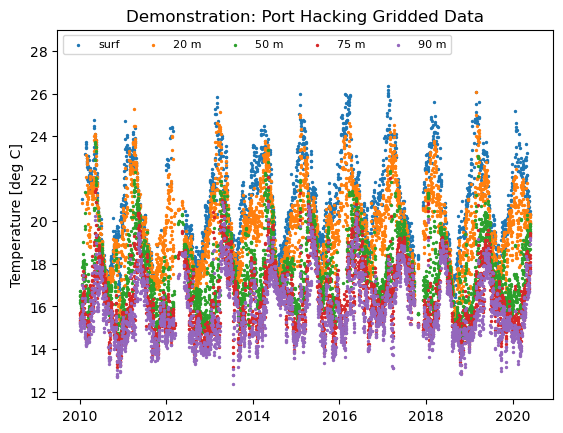

In [6]:
ax = plt.plot()
ctime = data_grid.TIME >= np.datetime64('2010-01-01')
t = np.array(data_grid.TIME[ctime])
plt.scatter(t,data_grid.TEMP_GRID[1,ctime],s=2) # surface
plt.scatter(t,data_grid.TEMP_GRID[21,ctime],s=2) # 20 m
plt.scatter(t,data_grid.TEMP_GRID[51,ctime],s=2) # 50 m
plt.scatter(t,data_grid.TEMP_GRID[76,ctime],s=2) # 75 m
plt.scatter(t,data_grid.TEMP_GRID[91,ctime],s=2) # 90 m
# plot properties and legend
plt.ylabel('Temperature [deg C]')
plt.title('Demonstration: Port Hacking Gridded Data')
plt.ylim(top=29)
plt.legend(['surf','20 m','50 m','75 m','90 m'],loc='upper left',
           ncol = 5,fontsize=8)

In [7]:
# You can save using the following:
plt.savefig(fname,dpi=300)
# If you want to explore the data more closely, use %matplotlib qt to enable plot pop-up. Use
# %matplotlib inline to revert back

<Figure size 640x480 with 0 Axes>

### 6. Demonstration: plot mean climatologies over depth

[Text(-6209.0, 0, 'Jan'),
 Text(-6178.0, 0, 'Feb'),
 Text(-6150.0, 0, 'Mar'),
 Text(-6119.0, 0, 'Apr'),
 Text(-6089.0, 0, 'May'),
 Text(-6058.0, 0, 'Jun'),
 Text(-6028.0, 0, 'Jul'),
 Text(-5997.0, 0, 'Aug'),
 Text(-5966.0, 0, 'Sep'),
 Text(-5936.0, 0, 'Oct'),
 Text(-5905.0, 0, 'Nov'),
 Text(-5875.0, 0, 'Dec'),
 Text(-5844.0, 0, 'Jan')]

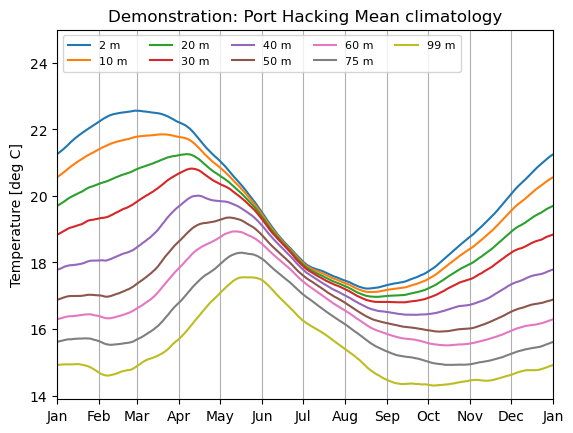

In [8]:
fig, ax = plt.subplots()
# loop through depths to plot climatology means
for depth in range(0,len(data_clim.TEMP_AVE)):
    depth_lab = str(np.int32(data_clim.DEPTH[depth])) + ' m'
    plt.plot(data_clim.TIME,data_clim.TEMP_AVE[depth,:],label=depth_lab)
# plot properties and legend
plt.ylabel('Temperature [deg C]')
plt.title('Demonstration: Port Hacking Mean climatology')
plt.legend(loc='upper left', ncol = 5,fontsize=8,
           bbox_to_anchor=(0, 1.0), borderpad=.5)
plt.ylim(top=25)
plt.grid(axis='x');
plt.xlim(left=np.datetime64('1953-01-01'),
                             right=np.datetime64('1954-01-01'))
# convert xticks to month strings
# define xticks and labels
xticks = [np.datetime64('1953-01-01'),np.datetime64('1953-02-01'),
          np.datetime64('1953-03-01'),np.datetime64('1953-04-01'),
          np.datetime64('1953-05-01'),np.datetime64('1953-06-01'),
          np.datetime64('1953-07-01'),np.datetime64('1953-08-01'),
          np.datetime64('1953-09-01'),np.datetime64('1953-10-01'),
          np.datetime64('1953-11-01'),np.datetime64('1953-12-01'),
          np.datetime64('1954-01-01')]
xticklabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul',
            'Aug','Sep','Oct','Nov','Dec','Jan']
# set xticks and labels
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

### 7. Demonstration: export data as CSV files

In [10]:
# exporting the climatology mean, 10th and 90th percentiles
# creating Pandas dataframe for saving
clim = np.transpose(np.vstack((data_clim.TEMP_AVE,
                               data_clim.TEMP_PER10,
                               data_clim.TEMP_PER90)))
column_names =  ['AVE 2m','AVE 10m','AVE 20m','AVE 30m','AVE 40m',
                'AVE 50m','AVE 60m','AVE 75m','AVE 99m',
                'PER10 2m','PER10 10m','PER10 20m','PER10 30m','PER10 40m',
                'PER10 50m','PER10 60m','PER10 75m','PER10 99m',
                'PER90 2m','PER90 10m','PER90 20m','PER90 30m','PER90 40m',
                'PER90 50m','PER90 60m','PER90 75m','PER90 99m',]
clim = pd.DataFrame(clim, columns = column_names)

# define saving location, This should be adjusted for your local destination directoy of the output .csv
saving_path = ('TO UPDATE')
# export data as .csv
clim.to_csv(saving_path + 'climatology.csv')